# Covariance estimation from data sets 

 ## Inspect 2-dimensional data set
 
__Tasks:__ 
 1. Inspect how the 2-dimensional toy data are constructed. 
 2. Visually inspect the data using a scatterplot (plt.scatter(...)) and a histogram (plt.hist(...)). Use different configurations of the covariance and plot them all to the same figure. Therefore, please review the properties of a covariance matrix.

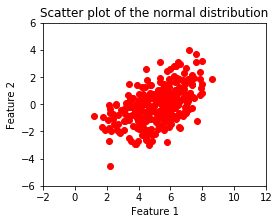

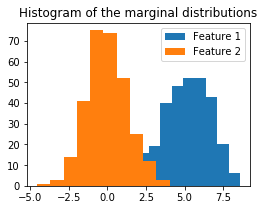

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Assign the "true" mean and covariance of your toy dataset
mean = [5, 0]
cov = [[2, 1], [1, 2]]  # diagonal covariance (symmetric & positive definite!)
N_samples = 300
# Draw samples from your dataset
X = np.random.multivariate_normal(mean, cov, N_samples)

# Scatter plot. Try different colors for different covariance matrices (use c=' ' parameter)
plt.figure(figsize=(4,3))
plt.scatter(X[:,0],X[:,1],c='red')
plt.xlim([-2,12])
plt.ylim([-6,6])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of the normal distribution')
plt.show()

# Histogram in both dimensions
plt.figure(figsize=(4,3))
plt.hist(X[:,0],label='Feature 1')
plt.hist(X[:,1],label='Feature 2')
plt.title('Histogram of the marginal distributions')
plt.legend()
plt.show()

## Covariance estimator for N-dimensional data

The function sample_generator() generates toy data for a given number of samples and draws its samples from a D-dimensional normal distribution. 

In [3]:
def generate_covariance(D_features):
        '''constructs a positive semi-definite covariance matrix
        Input: D_features
        Output: true covariance matrix true_cov (size: DxD)'''
        
        tmp = np.random.randn(D_features,D_features)
        true_cov = np.dot(tmp,tmp.transpose()) 
        
        return true_cov

def sample_generator(N_samples, true_cov):
        '''returns N_samples from a p=D_features variate normal distribution
        Input: N_samples, true_cov
        Output: data matrix X (size: NxD) '''

        mean = [0]*D_features
        # get samples from multivariate normal distribution
        X = np.random.multivariate_normal(mean, true_cov, N_samples)

        return X


__Tasks:__ 
  1. Implement a function estimate_covariance() that calculates the covariance matrix for a given data set $X$ of size $(N_{samples} \times D_{features})$. You can test your function with a data set returned from the function sample_generator(). 
  2. Compare your resulting covariance matrix with the corresponding built-in-function in the "Numpy" package. Please carefully check the documentation of the function for the definition of the input. You can visualize covariance matrices e.g. with the function plt.imshow(...) from the "Matplotlib" package. 


Text(0.5, 1.0, 'True covariance matrix')

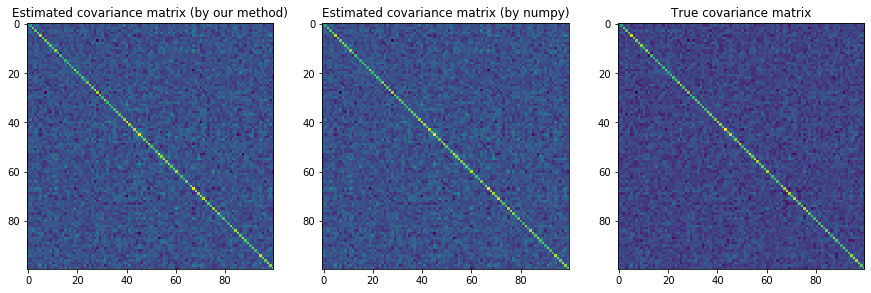

In [4]:
def estimate_covariance(X):
    '''estimate the covariance matrix
    Input: data matrix X (size: NxD) 
    Output: covariance matrix cov (size: DxD)'''
    
    N = len(X)
    mean = np.mean(X,0)
    cov = 1./(N-1)*np.dot((X-mean).T,(X-mean))  
    
    return cov

D_features = 100
N_samples = 200
true_cov = generate_covariance(D_features)
X = sample_generator(N_samples, true_cov)

# estimate covariance using your implementation
cov = estimate_covariance(X)
# estimate covariance using the numpy-function 
cov2 = np.cov(X.T)

# Use plt.subplots(...) to compare the three covariances matrices
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(15,6))
ax1.imshow(cov);
ax1.set_title('Estimated covariance matrix (by our method)')

ax2.imshow(cov2);
ax2.set_title('Estimated covariance matrix (by numpy)')

ax3.imshow(true_cov);
ax3.set_title('True covariance matrix')

## Bonus: Visualizing the eigenvectors of the covariance matrix

In this (optional) task, we want to shed light on the relationship between the eigenvalues / eigenvectors of the covariance matrix and the shape of the normal distribution in a 2D scenario. 

__Tasks__: 1.) Visualize a randomly sampled normal distribution (e.g. by using the seaborn function sns.jointplot()). The seaborn package is a matplotlib-based visualization package. You can install it by typing the following command in the terminal: __"sudo pip3 install seaborn"__. If you run the script and you do not see the data, also install the cairo backend with __"sudo pip3 install cairocffi"__.)

2.) Calculate eigenvalues and eigenvectors of the true covariance matrix.

3.) Draw the estimated eigenvectors multiplied by the square root of the corresponding eigenvalues in the same plot.

#### Q2.2.1 (Bonus) What do you observe regarding the size of the eigenvalues and the shape of the covariance matrix?

_Answer:_ The size of the eigenvalues is an indicator for the spread of the data in the direction of the eigenvector. More precisly, the larger the eigenvalue is, the larger is the spread of the data in the direction of the corresponding eigenvector.

#### Q2.2.2 (Bonus) If the eigenvalues are over -  or underestimated, what does this mean for the estimated shape of the normal distribution?

_Answer_: An overestimated eigenvalue leads to an elongated shape in the direction of the corresponding eigenvector, an underestimated eigenvalue leads to a squeezed shape in the direction of the corresponding eigenvector.

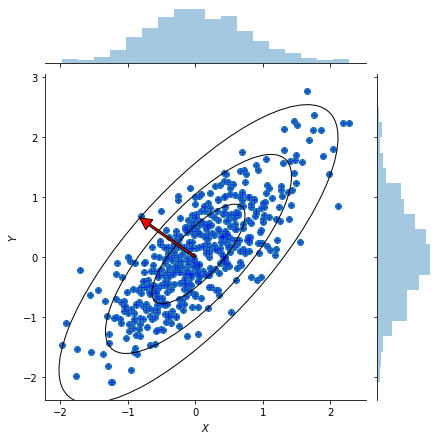

In [5]:
import seaborn as sns
from matplotlib.patches import Ellipse

np.random.seed(1235)
D_features = 2
N_samples = 500
true_cov = generate_covariance(D_features)
X = sample_generator(N_samples, true_cov)

# Compute eigenvalues
eig_w, eig_v = np.linalg.eig(true_cov)

# Plot results
s = sns.jointplot(X[:,0],X[:,1]);
s.plot_joint(plt.scatter, c="b", s=30, linewidth=1, alpha=0.43, marker="+")
s.set_axis_labels("$X$", "$Y$");

for index, eigenwert in enumerate(eig_w):
    start = (0,0)
    # Plot eigenvectors with factor 3 to look nice!
    # Note that 3*(std-dev) coves 99% of the data, 2*(std-dev) covers 95% and 1*(std-dev) covers 68%
    s.ax_joint.annotate(
        '', xy=eig_v[:,index]*np.sqrt(eigenwert)*3, xycoords='data',
        xytext=start, textcoords='data',
        arrowprops=dict(facecolor='red', width=2.0))

# This part is from participant ib131 who provided a nice visualization of the percentiles (99%, 95%, 68%)
for i in range(3):
    el = Ellipse(xy=(np.mean(X[:,0]), np.mean(X[:,1])),
                  width=np.sqrt(eig_w[0])*2*(i+1), height=np.sqrt(eig_w[1])*2*(i+1),
                  angle=np.rad2deg(np.arccos(eig_v[0,0])))
    el.set_facecolor('none')
    el.set_edgecolor('k')
    s.ax_joint.add_artist(el)

plt.show();

## Eigenvalue Spectrum for various sample sizes

__Tasks:__ For a fixed number of features $D_{features} = 100$, vary the number of samples $N_{samples}$ and implement the following steps:
 1. Estimate the covariance matrix from the generated samples X
 2. Calculate the eigenvalues of the covariance
 3. Sort the eigenvalues in descending order
 4. Plot the eigenvalues as a function of their order/rank (called eigenvalue spectrum)

This procedure should be repeated for the given sample sizes $N_{samples}=[20,50,100,300,1000]$ and all eigenvalue spectra shown in one figure. For comparison, repeat the steps (2)-(4) also for the true covariance matrix and add this eigenvalue spectrum to the created figure. Here is an example obtained for a given ground truth covariance matrix and one calculated using 120 samples from the same distribution

![title](data/eigenvalue_spectrum.png)

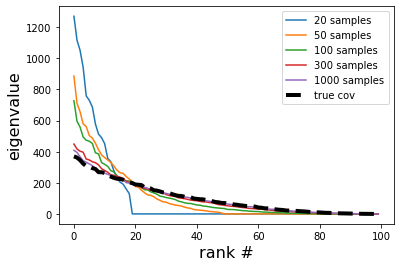

In [7]:
D_features = 100
N_samples = [20,50,100,300,1000]

true_cov = generate_covariance(D_features)

plt.figure()

for index, N_samples in enumerate(N_samples):
    
    # draw N_samples from a given true covariance matrix
    X = sample_generator(N_samples, true_cov)

    # estimate covariance from the data X (be careful about the output dimensions of np.cov)
    emp_cov = np.cov(X.T)
    # calculate eigenvectors of estimated covariance 
    emp_w, emp_v = np.linalg.eig(emp_cov)
    
    # plot the eigenvalue-spectrum for each sample configuration
    plt.plot(sorted(np.real(emp_w), reverse=True), label='%s samples' % N_samples)   

true_w, true_v = np.linalg.eig(true_cov)
    
plt.plot(sorted(true_w, reverse=True), label='true cov',color='black', ls = '--', linewidth=4)
plt.xlabel('rank #', fontsize=16)
plt.ylabel('eigenvalue', fontsize=16)
plt.legend()
plt.show()

#### Q2.2.3) What do you observe for the largest and smallest estimates of the eigenvalues?
-> Conclusions: Largest eigenvalues will be overestimated, smallest eigenvalues will be underestimated
#### Q2.2.4) What do you observe for an increasing number of N_samples?
-> Increased number of samples improves estimation. Estimated spectrum converges to true spectrum.
#### Q2.2.5) Which condition for the N_samples in relation to D_features is necessary to allow a training of the LDA?
 -> Problems with matrix inversion occur, if N_samples < D_features. Hence, it is required that N_samples >= D_features.
#### Q2.2.6) How can you manipulate your DATA to avoid this problem, in the case of N_samples < D_features?
 -> reduce data dimensionality (e.g. using only the most important features or applying a pre-processing step such as Principal Component Analysis (PCA))

## Bonus:  Improving covariance estimation by means of regularization

You may have observed a systematic error in the eigenvalue estimates, even for N_samples > D_features. 

#### Q2.2.7) (Bonus) Investigate a way to compensate for this systematic error such that the estimated spectrum approximates the true spectrum more closely. __Hint:__ Regularized estimation of covariance matrix.

In [6]:
from sklearn.covariance import shrunk_covariance

def mean_squared_error(y_pred, y_true):
    ''' returns the mean squared error 
    Input:estimated eigenvalue spectrum y_pred of size D 
          true eigenvalue spectrum y_true of size D
    Output: mean squared error ms_error'''
    
    y_true = np.sort(np.real(y_true))
    y_pred = np.sort(np.real(y_pred))
    ms_error = np.linalg.norm(y_pred-y_true)
    
    return ms_error

def regularized_covariance(X):
    improved_cov = np.cov(X.T)
    shrink_param = 0.3
    improved_cov = shrunk_covariance(improved_cov,shrink_param)
    return improved_cov

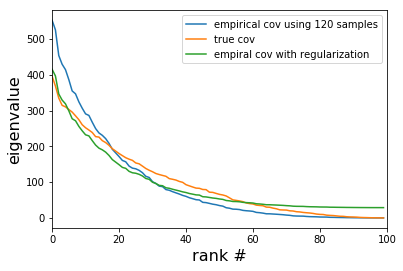

The mean squared error vs no regularized is 385.0.
The mean squared error vs regularized is 218.4.


In [7]:


# this seed ensures comparable results when repeating the calculation. Please keep this unchanged!!!
np.random.seed(1337)

# please keep this N_samples unchanged!
N_samples = 120

true_cov = generate_covariance(D_features)
X = sample_generator(N_samples, true_cov)

# true eigenvalue spectrum (sorted)
true_w, true_v = np.linalg.eig(true_cov)
true_w = np.array(sorted(true_w, reverse=True))

# calculate eigenvectors of estimated covariance 
emp_cov = np.cov(X.T)
emp_w, emp_v = np.linalg.eig(emp_cov)
emp_w = np.array(sorted(np.real(emp_w), reverse=True))

# Your approach
improved_cov = regularized_covariance(X)
improved_w, emp_v = np.linalg.eig(improved_cov)
improved_w = np.array(sorted(np.real(improved_w), reverse=True))


plt.figure()
plt.plot(emp_w, label='empirical cov using %s samples' % N_samples)
plt.plot(true_w, label='true cov')
plt.plot(improved_w, label='empiral cov with regularization')
plt.xlabel('rank #', fontsize=16)
plt.ylabel('eigenvalue', fontsize=16)
plt.xlim(0,100)
plt.legend()
plt.show()

# report on the mean squared error between true covariance and your covariance estimation
# as a baseline, you need to improve upon the mean squared error between emp_w and true_w
error = mean_squared_error(emp_w,true_w)
print('The mean squared error vs no regularized is %.1f.' %error)

error = mean_squared_error(improved_w,true_w)
print('The mean squared error vs regularized is %.1f.' %error)

__Answer__: Shrinkage of the covariance towards the unit circle helps to improve the covariance estimate. 
    First ranked eigenvalues get smaller, low ranked eigenvalues increase.
    
 